**Experiment No. 9**

Data Cleaning and Preparation
Problem Statement: Analyzing Customer Churn in a Telecommunications Company

Dataset: "Telecom_Customer_Churn.csv"

Description: The dataset contains information about customers of a telecommunications company and whether they have churned (i.e., discontinued their services). The dataset includes various attributes of the customers, such as their demographics, usage patterns, and account information. The goal is to perform data cleaning and preparation to gain insights into the factors that contribute to customer churn.

Tasks to Perform:
1. Import the "Telecom_Customer_Churn.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Handle missing values in the dataset, deciding on an appropriate strategy.
4. Remove any duplicate records from the dataset.
5. Check for inconsistent data, such as inconsistent formatting or spelling variations,
and standardize it.
6. Convert columns to the correct data types as needed.
7. Identify and handle outliers in the data.
8. Perform feature engineering, creating new features that may be relevant to
predicting customer churn.
9. Normalize or scale the data if necessary.
10. Split the dataset into training and testing sets for further analysis.
11. Export the cleaned dataset for future analysis or modeling.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# 1) import Dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# 2) Explore Dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# 3) Fill Missing Values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
# 4) Remove Duplicates
df = df.drop_duplicates()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# 5) Check inconsistent Data
print(df['gender'].unique())
print(df['PhoneService'].unique())

['Female' 'Male']
['No' 'Yes']


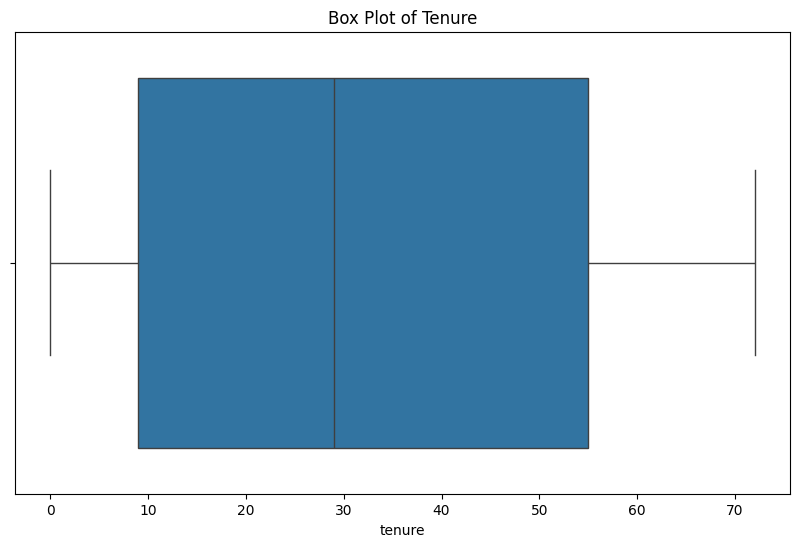

In [18]:
# 6) Identify Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tenure'])
plt.title('Box Plot of Tenure')
plt.show()

In [19]:
# Step 8: Perform feature engineering
df['monthlycharges_per_tenure'] = df['MonthlyCharges'] / (df['tenure'] + 1)
df['has_internet_service'] = df['InternetService'].apply(lambda x: 1 if x != 'No' else 0)

In [20]:
print(df['monthlycharges_per_tenure'])
df['has_internet_service']

0       14.925000
1        1.627143
2       17.950000
3        0.919565
4       23.566667
          ...    
7038     3.392000
7039     1.413699
7040     2.466667
7041    14.880000
7042     1.576866
Name: monthlycharges_per_tenure, Length: 7043, dtype: float64


,has_internet_service
0,1
1,1
2,1
3,1
4,1
...,...
7038,1
7039,1
7040,1
7041,1


In [21]:
df.to_csv('Processed_Telecom_Customer_Churn.csv', index=False)